In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 2
## Exercise 1
- Downloading public safety .csv file.

File can now be retrieved using `dvc pull`

- Using pandas to retrieve simple statistics.


In [2]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [3]:
print("Total number of crimes")
print(df.shape[0])
print()

print("Crime catagories")
print(f"Num of categories: {len(df.Category.unique())}")
print(f"Categories: {df.Category.unique()}")
print()

print("Num of crimes in each category")
print(df.Category.value_counts())

Total number of crimes
2129525

Crime catagories
Num of categories: 37
Categories: ['LARCENY/THEFT' 'ASSAULT' 'MISSING PERSON' 'VEHICLE THEFT'
 'SUSPICIOUS OCC' 'NON-CRIMINAL' 'OTHER OFFENSES' 'VANDALISM'
 'PROSTITUTION' 'BURGLARY' 'WEAPON LAWS' 'TRESPASS' 'WARRANTS'
 'KIDNAPPING' 'FRAUD' 'ROBBERY' 'STOLEN PROPERTY' 'DRUG/NARCOTIC'
 'RECOVERED VEHICLE' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES, FORCIBLE' 'LOITERING' 'SECONDARY CODES' 'EMBEZZLEMENT'
 'FORGERY/COUNTERFEITING' 'DRUNKENNESS' 'ARSON' 'EXTORTION' 'LIQUOR LAWS'
 'SEX OFFENSES, NON FORCIBLE' 'SUICIDE' 'BAD CHECKS' 'GAMBLING' 'BRIBERY'
 'PORNOGRAPHY/OBSCENE MAT' 'TREA']

Num of crimes in each category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURG

## Exercise 2

<AxesSubplot:>

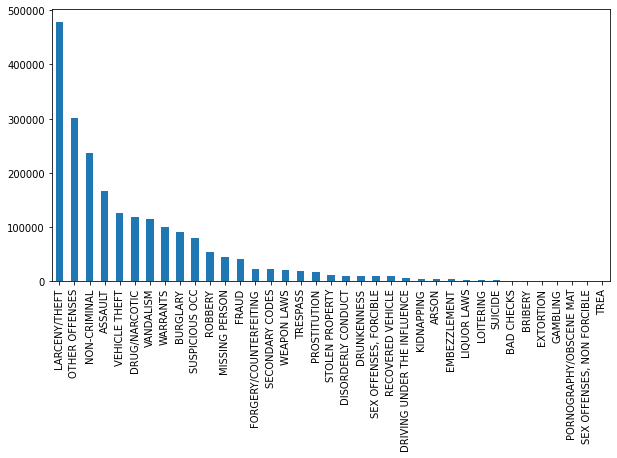

In [4]:
plt.figure(figsize=(10, 5))
df.Category.value_counts().plot.bar()

# Exercise 3

In [5]:
# Creating new col with only year for easier acess
df["Year"] = pd.to_datetime(df.Date).dt.year

print("Year with most crimes")
print(df.Year.value_counts(ascending=False).head(1))
print()

print("Year with least crime")
print(df.Year.value_counts(ascending=True).head(1))
print()

print("Average number of crimes per year")
print(df.Year.value_counts().mean())

Year with most crimes
2015    151459
Name: Year, dtype: int64

Year with least crime
2018    45059
Name: Year, dtype: int64

Average number of crimes per year
133095.3125


### Changing previous plot to instead include average number of crimes per year by category

### Temporal Development of subcats

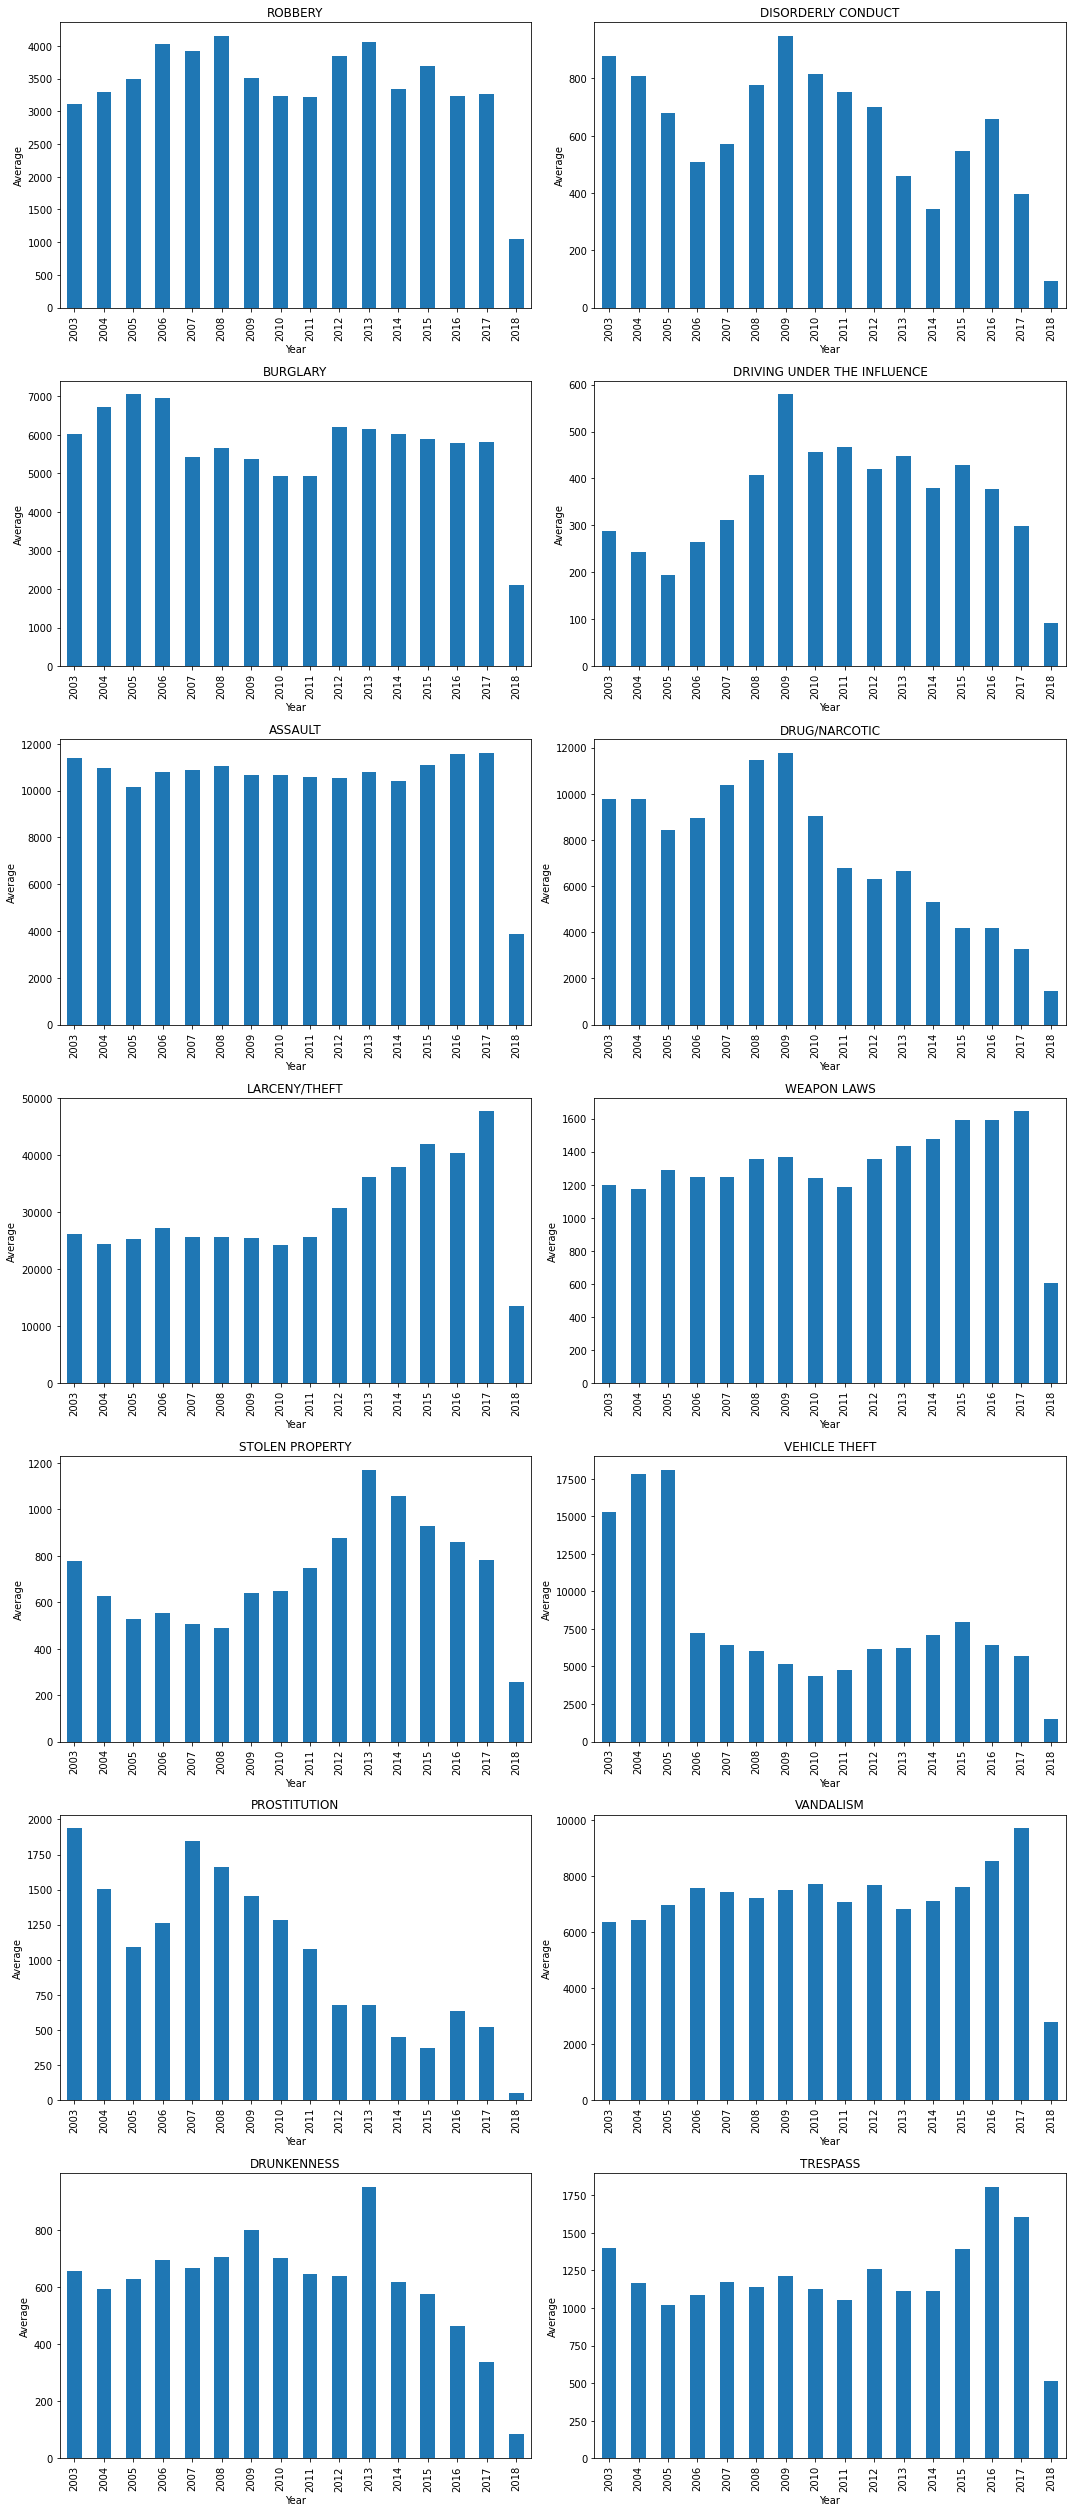

In [6]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

fig, axs = plt.subplots(7, 2, figsize=(15, 35))
for crime, ax in zip(focuscrimes, axs.flatten()):
    df[df.Category == crime].Year.value_counts().sort_index().plot.bar(ax=ax, title=crime, xlabel="Year", ylabel="Average")
plt.tight_layout()